In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(r'C:\Users\soham\Downloads\USA Housing Dataset.csv')
df = df.drop(['date', 'street', 'city', 'statezip', 'country'], axis='columns')
df


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,3.760000e+05,3.0,2.00,1340,1384,3.0,0,0,3,1340,0,2008,0
1,8.000000e+05,4.0,3.25,3540,159430,2.0,0,0,3,3540,0,2007,0
2,2.238888e+06,5.0,6.50,7270,130017,2.0,0,0,3,6420,850,2010,0
3,3.240000e+05,3.0,2.25,998,904,2.0,0,0,3,798,200,2007,0
4,5.499000e+05,5.0,2.75,3060,7015,1.0,0,0,5,1600,1460,1979,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4135,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979
4136,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009
4137,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0
4138,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0


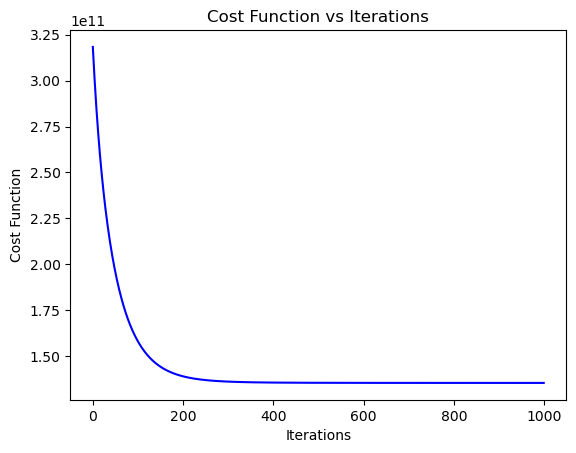

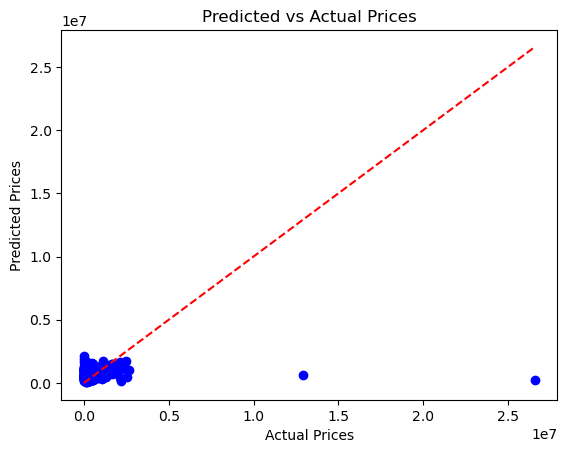

Enter the following details for prediction:
bedrooms: 2
bathrooms: 2
sqft_living: 2
sqft_lot: 2
floors: 2
waterfront: 2
view: 2
condition: 2
sqft_above: 2
sqft_basement: 2
yr_built: 2
yr_renovated: 2
Predicted Price: 5238992.88


In [6]:
X = df.drop('price', axis=1)
y = df['price']
X_scaled = (X - X.mean()) / X.std()
X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled]
y = y.values.reshape(-1, 1)
train_size = int(0.8 * len(X_scaled))
X_train, X_test = X_scaled[:train_size], X_scaled[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    for i in range(iterations):
        predictions = X.dot(theta)
        theta = theta - (1 / m) * learning_rate * (X.T.dot(predictions - y))
        cost_history[i] = compute_cost(X, y, theta)
    return theta, cost_history
theta = np.zeros((X_scaled.shape[1], 1))
learning_rate = 0.01
iterations = 1000

theta, cost_history = gradient_descent(X_scaled, y, theta, learning_rate, iterations)
plt.plot(range(iterations), cost_history, color='blue')
plt.title('Cost Function vs Iterations')
plt.xlabel('Iterations')
plt.ylabel('Cost Function')
plt.show()

y_pred = X_test.dot(theta)
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predicted vs Actual Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()

def predict_price():
    print("Enter the following details for prediction:")
    for col in X.columns:
        value = float(input(f"{col}: "))
        X_input.append(value)

    X_input_scaled = [(X_input[i] - X[col].mean()) / X[col].std() for i, col in enumerate(X.columns)]
    X_input_scaled = [1] + X_input_scaled  
    

    X_input_scaled = np.array(X_input_scaled).reshape(1, -1)
    predicted_price = X_input_scaled.dot(theta)
    print(f"Predicted Price: {predicted_price[0][0]:.2f}")


X_input = []
predict_price()